# Random Forest Regression 

## Bicycle Project 

In [1]:
#Project Goal
#The project entailed donating bicycles to students in selected high schools in Kisumu County,Kenya.The goal was to reduce the time the students spent to and from school and instead invest the time saved on studies.

In [2]:
#Hypothesis
#H0:The relationship between increased study-time resulting from bicycles donations did not significantly affect the test scores of the students.

In [3]:
#importing the libraries 
import numpy as np
import pandas as pd

In [4]:
#importing the dataset 
df=pd.read_csv('bicycles_project.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
#exploring the data,checking the first five cases
df.head(5)

,score_improvement,additional_study_hrs
0,6.33,9.0
1,6.33,9.0
2,6.00,9.0
3,7.67,12.5
4,5.33,7.5


In [6]:
#exploring the data,checking the descriptive statistics
df.describe()

,score_improvement,additional_study_hrs
count,362.000000,362.000000
mean,6.596961,9.406077
std,0.853049,1.305016
min,3.670000,7.000000
25%,6.000000,8.500000
50%,6.670000,9.500000
75%,7.330000,10.000000
max,8.000000,12.500000


In [7]:
#Exploring the relationship between additional study hours and scores
df.corr()

,score_improvement,additional_study_hrs
score_improvement,1.000000,0.517036
additional_study_hrs,0.517036,1.000000


In [8]:
#Exploring the data,visualizing the data 
import seaborn as sns
sns.pairplot(df)

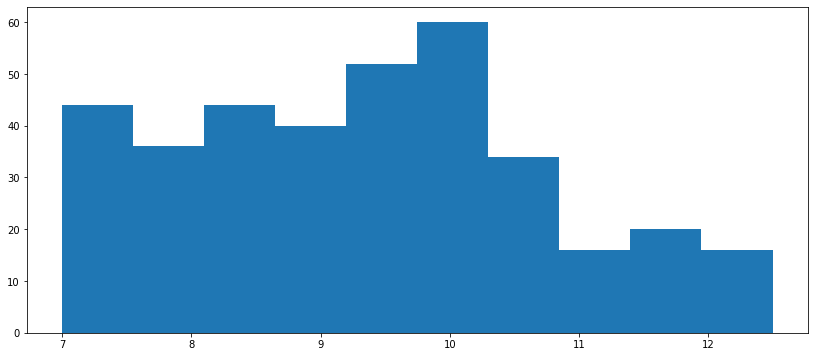

In [9]:
#Cheking the distribution of the independent variable using histogram
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(df['additional_study_hrs'])
pyplot.show()

In [10]:
#Splitting the data into train and test sets and training the model on the test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [11]:
#Training the Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state =0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [12]:
#Predicting new results
regressor.predict([[4]])

array([8.])

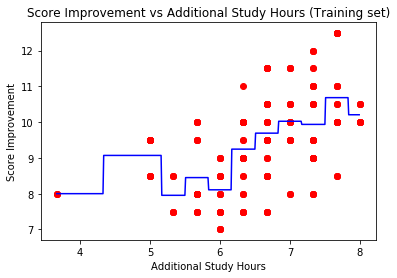

In [15]:
#Visualizing the Random Forest Regression Model
import matplotlib.pyplot as plt 
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Score Improvement vs Additional Study Hours (Training set)')
plt.xlabel('Additional Study Hours')
plt.ylabel('Score Improvement')
plt.show()

In [18]:
#Hypothesis Testing Using p-value
from scipy.stats import shapiro

df = df['additional_study_hrs']

stat, p = shapiro(df)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.96, p=0.000000040648778565355314640328
Not a normal distribution


In [14]:
#The p-value < 0.05,therefore reject the NULL HYPOTHESIS THAT, the relationship between increased study-time resulting from bicycles donations did not significantly and positively affect the test scores of the students.